https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import subplot
import scipy.stats as stats
from statsmodels.stats.weightstats import *
from statsmodels.stats.proportion import proportion_confint
from statsmodels.stats.weightstats import zconfint
import warnings
warnings.filterwarnings('ignore')

In [3]:
path = 'heart_failure_clinical_records_dataset.csv'
df = pd.read_csv(path)
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


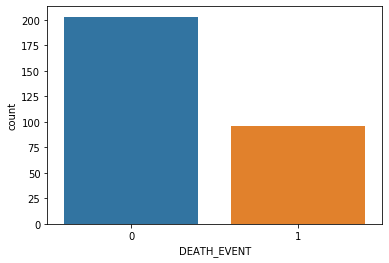

In [5]:
sns.countplot(df.DEATH_EVENT)
plt.show()

Features: 
* anaemia - Decrease of red blood cells or hemoglobin (boolean)
* creatinine_phosphokinase - Level of the CPK enzyme in the blood (mcg/L)
* diabets - If the patient has diabetes (boolean)
* ejection_fraction - Percentage of blood leaving the heart at each contraction (percentage)
* high_blood_pressure	- If the patient has hypertension (boolean)
* platelets - Platelets in the blood (kiloplatelets/mL)
* serum_creatinine - Level of serum creatinine in the blood (mg/dL)
* serum_sodium - Level of serum sodium in the blood (mEq/L)
* smoking - If the patient smokes or not (boolean)
* time - Follow-up period (days)
* DEATH_EVENT - If the patient deceased during the follow-up period (boolean) (TARGET)

In [9]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [8]:
print('Count uniqie values of features')
for col in df.columns:
    print(col, ':', df[col].nunique())

Count uniqie values of features
age : 47
anaemia : 2
creatinine_phosphokinase : 208
diabetes : 2
ejection_fraction : 17
high_blood_pressure : 2
platelets : 176
serum_creatinine : 40
serum_sodium : 27
sex : 2
smoking : 2
time : 148
DEATH_EVENT : 2


<i>We have two group of features: binary(anaemia, sex, smoking, diabetes, high_blood_pressure) and numerical(other)

## Visual and stats analysis(relationship with target features) 

### Binary features

In [50]:
def research_bin(col):
    
    print(col.upper())
    n1 = len(df[df.DEATH_EVENT == 1])
    n0 = len(df[df.DEATH_EVENT == 0])
    
    prop_not_death = proportion_confint(df[df.DEATH_EVENT == 0][col].sum(), n0, method = 'wilson')
    prop_death = proportion_confint(df[df.DEATH_EVENT == 1][col].sum(), n1, method = 'wilson')
    print('95% confidence interval for a anaemia probability in "death" class:', prop_death)
    print('95% confidence interval for a anaemia probability in "alive" class:', prop_not_death)  
    
    z = stats.norm.cdf(1-0.05/2)
    p1 = df[df.DEATH_EVENT == 1][col].sum()/len(df[df.DEATH_EVENT == 1])
    p0 = df[df.DEATH_EVENT == 0][col].sum()/len(df[df.DEATH_EVENT == 0])

    left_bound = p0 - p1 - np.sqrt(p0*(1-p0)/n0 + p1*(1 - p1)/n1)
    right_bound = p0 - p1 + np.sqrt(p0*(1-p0)/n0 + p1*(1 - p1)/n1)
    print("95% confidence interval for a difference between proportions:", [round(left_bound, 5), round(right_bound, 5)])
    P = float(p1*n1 + p0*n0) / (n1 + n0)
    z_stat = (p0 - p1) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n0))
    print("p-value of h0 (proportions are equal): ", round(2 * (1 - stats.norm.cdf(abs(z_stat))), 5))
    
    print('Criterion of chi2 (independence with target feature): p-value = {0}, chi2-statistic = {1}'.format(round(stats.chi2_contingency(pd.crosstab(df[col], 
                                                                                                             df["DEATH_EVENT"]))[1], 5),
                                                                         round(stats.chi2_contingency(pd.crosstab(df[col], 
                                                                                                             df["DEATH_EVENT"]))[0], 5)))
    print('Correlation of Matthew(with target feature):', round(np.sqrt(stats.chi2_contingency(pd.crosstab(df[col], df["DEATH_EVENT"]))[0])/2, 5))
    print('\n')

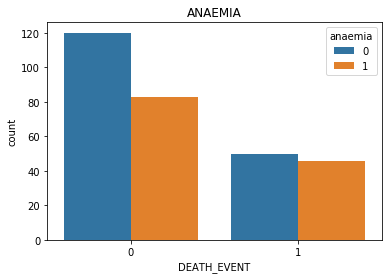

ANAEMIA
95% confidence interval for a anaemia probability in "death" class: (0.38197415989549227, 0.5779623229319109)
95% confidence interval for a anaemia probability in "alive" class: (0.3435399740897469, 0.47757905972989745)
95% confidence interval for a difference between proportions: [-0.13186, -0.00873]
p-value of h0 (proportions are equal):  0.25183
Criterion of chi2 (independence with target feature): p-value = 0.30732, chi2-statistic = 1.04218
Correlation of Matthew(with target feature): 0.51043




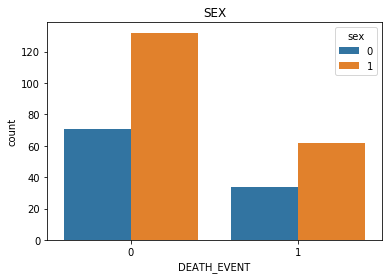

SEX
95% confidence interval for a anaemia probability in "death" class: (0.546243023422573, 0.734201596785605)
95% confidence interval for a anaemia probability in "alive" class: (0.5824056286089185, 0.7125062345532893)
95% confidence interval for a difference between proportions: [-0.05477, 0.0636]
p-value of h0 (proportions are equal):  0.9405
Criterion of chi2 (independence with target feature): p-value = 0.95605, chi2-statistic = 0.00304
Correlation of Matthew(with target feature): 0.02755




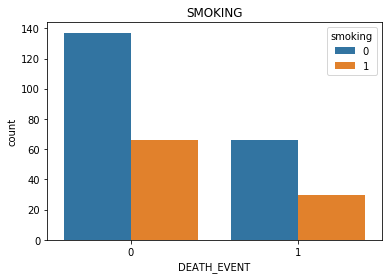

SMOKING
95% confidence interval for a anaemia probability in "death" class: (0.2285095463775014, 0.41091879906912687)
95% confidence interval for a anaemia probability in "alive" class: (0.2644524212399813, 0.392289508522039)
95% confidence interval for a difference between proportions: [-0.04499, 0.07023]
p-value of h0 (proportions are equal):  0.82722
Criterion of chi2 (independence with target feature): p-value = 0.93177, chi2-statistic = 0.00733
Correlation of Matthew(with target feature): 0.04281




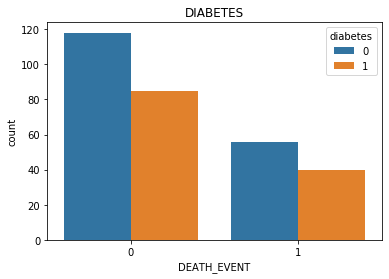

DIABETES
95% confidence interval for a anaemia probability in "death" class: (0.3231156107133069, 0.5166303205963056)
95% confidence interval for a anaemia probability in "alive" class: (0.3529786230715643, 0.48747889357838875)
95% confidence interval for a difference between proportions: [-0.05903, 0.06313]
p-value of h0 (proportions are equal):  0.9732
Criterion of chi2 (independence with target feature): p-value = 0.92672, chi2-statistic = 0.00846
Correlation of Matthew(with target feature): 0.04598




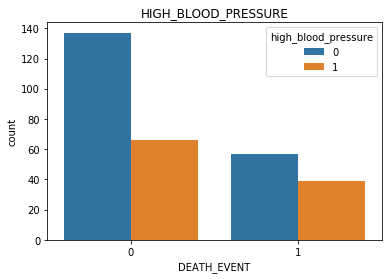

HIGH_BLOOD_PRESSURE
95% confidence interval for a anaemia probability in "death" class: (0.3134530216650167, 0.5062611510582975)
95% confidence interval for a anaemia probability in "alive" class: (0.2644524212399813, 0.392289508522039)
95% confidence interval for a difference between proportions: [-0.14107, -0.02118]
p-value of h0 (proportions are equal):  0.17003
Criterion of chi2 (independence with target feature): p-value = 0.2141, chi2-statistic = 1.54346
Correlation of Matthew(with target feature): 0.62118




In [77]:
bin_cols = ['anaemia', 'sex', 'smoking', 'diabetes', 'high_blood_pressure']
for col in bin_cols:
    sns.countplot(df.DEATH_EVENT, hue = df[col])
    plt.title(col.upper())
    plt.show()
    research_bin(col)

## Numerical features

In [10]:
def analisys_num(col):
    
    print(col.upper())
    print('Distribution %s in diff classes(of target feature)' % col)
    plt.figure(figsize = (14, 5))
    subplot(1, 2, 1)
    sns.distplot(df[df.DEATH_EVENT == 1][col])
    sns.distplot(df[df.DEATH_EVENT == 0][col])

    subplot(1, 2, 2)
    sns.boxplot(y = df[col], x = df.DEATH_EVENT)
    plt.show()
    
    print('Statistic conclusion from data:')
    print('95% confidence interval for the mean in "death" class:', zconfint(df[df.DEATH_EVENT == 1][col]))
    print('95% confidence interval for the mean in "alive" class:', zconfint(df[df.DEATH_EVENT == 0][col]))

    print("p-value of h0 (distributions are equal, criterion 'mannwhitneyu'): ", stats.mannwhitneyu(df[df.DEATH_EVENT == 1][col], 
                                                                          df[df.DEATH_EVENT == 0][col])[1])

    df['n'] = (df[col] - df[col].mean())/df[col].std()
    diff = df[df.DEATH_EVENT == 1]['n'].mean() - df[df.DEATH_EVENT == 0]['n'].mean()
    print('Correlation (difference between expectations of two class):', diff, '\n')
    

CREATININE_PHOSPHOKINASE
Distribution creatinine_phosphokinase in diff classes(of target feature)


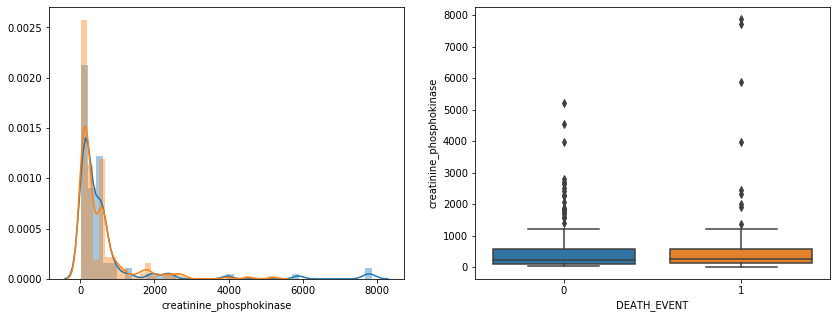

Statistic conclusion from data:
95% confidence interval for the mean in "death" class: (406.831776368356, 933.5640569649772)
95% confidence interval for the mean in "alive" class: (436.35963072501625, 643.7487436592202)
p-value of h0 (distributions are equal, criterion 'mannwhitneyu'):  0.3420200130720179
Correlation (difference between expectations of two class): 0.13412898590363725 

EJECTION_FRACTION
Distribution ejection_fraction in diff classes(of target feature)


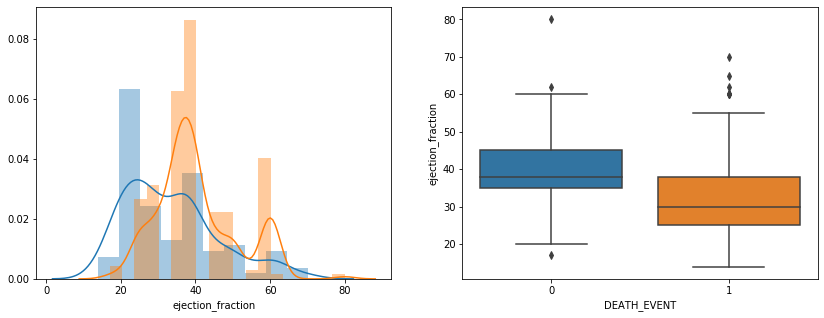

Statistic conclusion from data:
95% confidence interval for the mean in "death" class: (30.963213539976586, 35.974286460023414)
95% confidence interval for the mean in "alive" class: (38.77208619398101, 41.759933510452484)
p-value of h0 (distributions are equal, criterion 'mannwhitneyu'):  3.684124584238869e-07
Correlation (difference between expectations of two class): -0.5743431619359419 

PLATELETS
Distribution platelets in diff classes(of target feature)


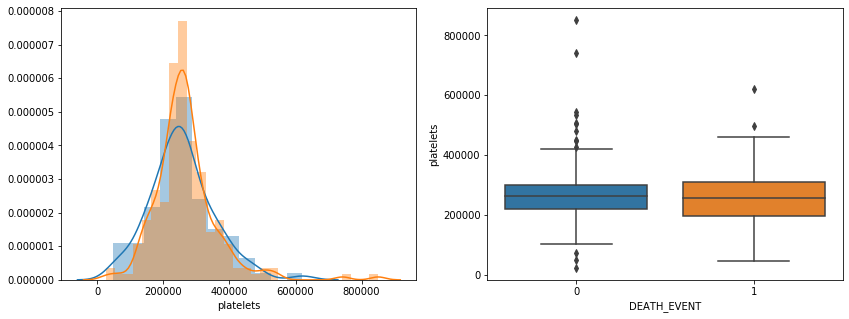

Statistic conclusion from data:
95% confidence interval for the mean in "death" class: (236672.16557305885, 276089.92401027447)
95% confidence interval for the mean in "alive" class: (253240.85351151234, 280074.1262914433)
p-value of h0 (distributions are equal, criterion 'mannwhitneyu'):  0.2127792549023304
Correlation (difference between expectations of two class): -0.10507157398117371 

SERUM_CREATININE
Distribution serum_creatinine in diff classes(of target feature)


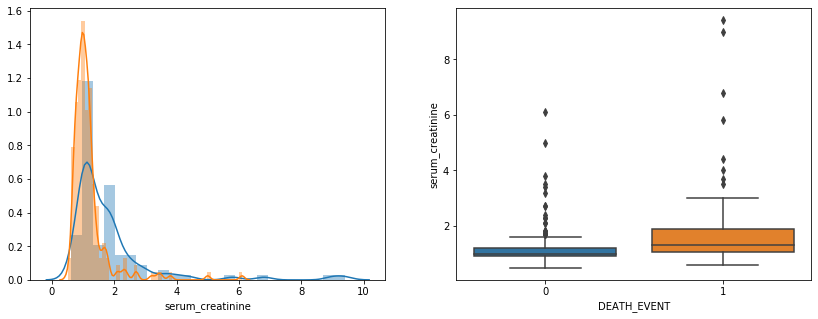

Statistic conclusion from data:
95% confidence interval for the mean in "death" class: (1.542065240773331, 2.129601425893336)
95% confidence interval for the mean in "alive" class: (1.0948995996625723, 1.2748540949187084)
p-value of h0 (distributions are equal, criterion 'mannwhitneyu'):  7.904989505917019e-11
Correlation (difference between expectations of two class): 0.6292413275025944 

SERUM_SODIUM
Distribution serum_sodium in diff classes(of target feature)


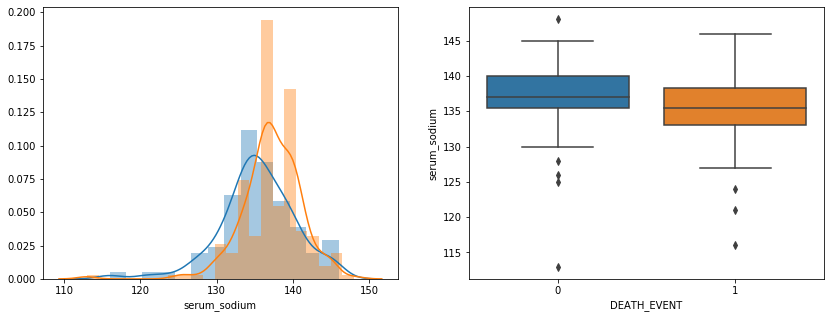

Statistic conclusion from data:
95% confidence interval for the mean in "death" class: (134.37449426782882, 136.37550573217118)
95% confidence interval for the mean in "alive" class: (136.66884785851028, 137.76464967843555)
p-value of h0 (distributions are equal, criterion 'mannwhitneyu'):  0.00014637787318887364
Correlation (difference between expectations of two class): -0.41739563740965235 

TIME
Distribution time in diff classes(of target feature)


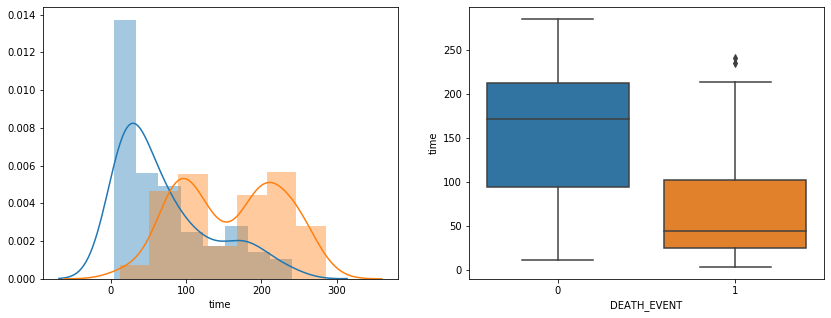

Statistic conclusion from data:
95% confidence interval for the mean in "death" class: (58.4073910136064, 83.36344231972694)
95% confidence interval for the mean in "alive" class: (149.02102232684732, 167.6587806288177)
p-value of h0 (distributions are equal, criterion 'mannwhitneyu'):  3.42609832706714e-21
Correlation (difference between expectations of two class): -1.1267844782642689 



In [62]:
num_cols = ['creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
for col in num_cols:
    analisys_num(col)
    
del df['n']

Now, we can divide features into two group(relationship to a target feature):
* High correlation(binary: high_blood_pressure, anaemia; numerical: ejection_fraction, serum_creatinine, serum_sodium, time) 
* Low correlation(binary: sex, smoking, diabets; numerical: platelets, creatinine_phosphokinase)

<i>Based on features from first group we can assert about high risk of heart failure

## Dependency between not target features

### Only numerical features

<i>Let's see on all features except target. Probably we'll find any interesting dependecy in features.

In [12]:
# table of pair correlations
df[num_cols].corr()

,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
creatinine_phosphokinase,1.000000,-0.044080,0.024463,-0.016408,0.059550,-0.009346
ejection_fraction,-0.044080,1.000000,0.072177,-0.011302,0.175902,0.041729
platelets,0.024463,0.072177,1.000000,-0.041198,0.062125,0.010514
serum_creatinine,-0.016408,-0.011302,-0.041198,1.000000,-0.189095,-0.149315
serum_sodium,0.059550,0.175902,0.062125,-0.189095,1.000000,0.087640
time,-0.009346,0.041729,0.010514,-0.149315,0.087640,1.000000


<i>Based on correlation betweeen num features, here is nothing interesting. Except maybe serum_creatinine and serum_sodium.	

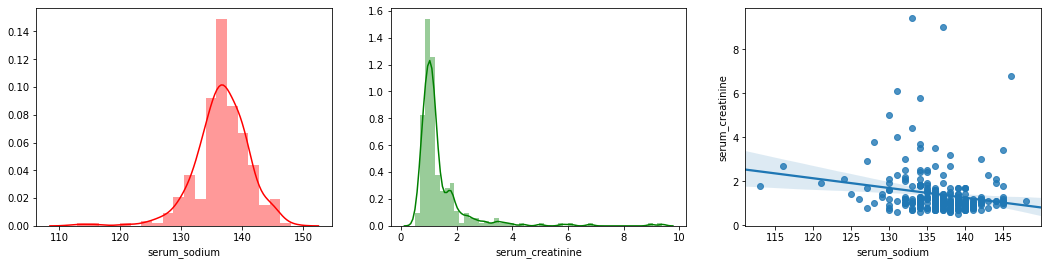

In [40]:
plt.figure(figsize = (18, 4))
subplot(1, 3, 1)
sns.distplot(df.serum_sodium, color = 'red')

subplot(1, 3, 2)
sns.distplot(df.serum_creatinine, color = 'green')

subplot(1, 3, 3)
sns.regplot(df.serum_sodium, df.serum_creatinine)
plt.show()

<i>It's difficult to see any strikly dependency.
Probably the reason for bad correlation of num features is competent reserch, because all these features give important information that can't be obtained through other features.<br>  
Now check out binary features.

### Only binary features

In [31]:
from itertools import combinations

In [58]:
comb = combinations(bin_cols, 2)
for i in comb:
    print("Features:", i, ', p_value(hypotesys of independence) = ', round(stats.chi2_contingency(pd.crosstab(df[i[0]], 
                                                                                                             df[i[1]]))[1], 5))

Features: ('anaemia', 'sex') , p_value(hypotesys of independence) =  0.12942
Features: ('anaemia', 'smoking') , p_value(hypotesys of independence) =  0.0836
Features: ('anaemia', 'diabetes') , p_value(hypotesys of independence) =  0.91896
Features: ('anaemia', 'high_blood_pressure') , p_value(hypotesys of independence) =  0.59063
Features: ('sex', 'smoking') , p_value(hypotesys of independence) =  0.0
Features: ('sex', 'diabetes') , p_value(hypotesys of independence) =  0.0092
Features: ('sex', 'high_blood_pressure') , p_value(hypotesys of independence) =  0.09256
Features: ('smoking', 'diabetes') , p_value(hypotesys of independence) =  0.01555
Features: ('smoking', 'high_blood_pressure') , p_value(hypotesys of independence) =  0.40451
Features: ('diabetes', 'high_blood_pressure') , p_value(hypotesys of independence) =  0.92245


<i>There is something interesting.<br> 
Pair ('sex', 'smoking') stands out from other pair and few pair has significult dependence(0.05 > p-value).<br>
Drow the graphs and look at distribution this features.

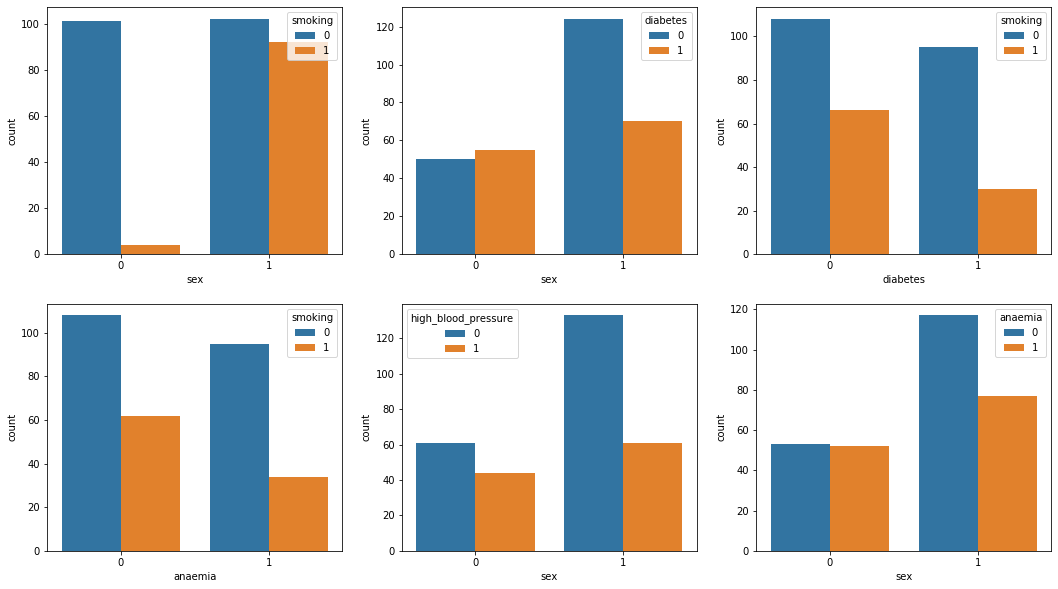

In [61]:
plt.figure(figsize = (18, 10))
subplot(2, 3, 1)
sns.countplot(x = df.sex, hue = df.smoking)

subplot(2, 3, 2)
sns.countplot(x = df.sex, hue = df.diabetes)

subplot(2, 3, 3)
sns.countplot(x = df.diabetes, hue = df.smoking)

subplot(2, 3, 4)
sns.countplot(x = df.anaemia, hue = df.smoking)

subplot(2, 3, 5)
sns.countplot(x = df.sex, hue = df.high_blood_pressure)

subplot(2, 3, 6)
sns.countplot(x = df.sex, hue = df.anaemia)

plt.show()

Conclusions(only about observed sample):
* Male smoke a lot more than women.
* Also we can see that diabetes is more common in females rather than males(possible reason - dietary preference in diferent sexes. For example women more like cake and sweets, etc).
* Proportion people with such health problems as anaemia and high blood pressure is higher in female class(Feasible reason for this is both habits that is unusual for men or genetic differences)
* There isn't relation between smoking and existence of health problems(anaemia, high pressure, diabetes). It's unusual, because smoking significantly damage health and can indirectly influence on other diseases.
* Three disease in sample (anaemia, high pressure, diabetes) have strikly relations between each other.

### Mixed pairs

In [87]:
for bin_col in bin_cols:
    print(bin_col.upper())
    i = 0
    for col in num_cols:
        i += 1
        df['n'] = (df[col] - df[col].mean())/df[col].std()
        diff = df[df[bin_col] == 1]['n'].mean() - df[df[bin_col] == 0]['n'].mean()
        print('| {0} - {1} |'.format(col, bin_col), round(diff, 3)) 
    print('\n')
# correlations in pairs

ANAEMIA
| creatinine_phosphokinase - anaemia | -0.384
| ejection_fraction - anaemia | 0.064
| platelets - anaemia | -0.088
| serum_creatinine - anaemia | 0.105
| serum_sodium - anaemia | 0.084
| time - anaemia | -0.285


SEX
| creatinine_phosphokinase - sex | 0.167
| ejection_fraction - sex | -0.31
| platelets - sex | -0.262
| serum_creatinine - sex | 0.015
| serum_sodium - sex | -0.058
| time - sex | -0.033


SMOKING
| creatinine_phosphokinase - smoking | 0.005
| ejection_fraction - smoking | -0.144
| platelets - smoking | 0.06
| serum_creatinine - smoking | -0.059
| serum_sodium - smoking | 0.01
| time - smoking | -0.049


DIABETES
| creatinine_phosphokinase - diabetes | -0.02
| ejection_fraction - diabetes | -0.01
| platelets - diabetes | 0.187
| serum_creatinine - diabetes | -0.095
| serum_sodium - diabetes | -0.181
| time - diabetes | 0.068


HIGH_BLOOD_PRESSURE
| creatinine_phosphokinase - high_blood_pressure | -0.148
| ejection_fraction - high_blood_pressure | 0.051
| platelets 

<i>We can observe low or medium correlation in next pair(other pairs has too low correlations): 
* time - high_blood_pressure
* platelets - sex
* time - anaemia
* creatinine_phosphokinase - anaemia<br>

Let's see on these distributions in classes

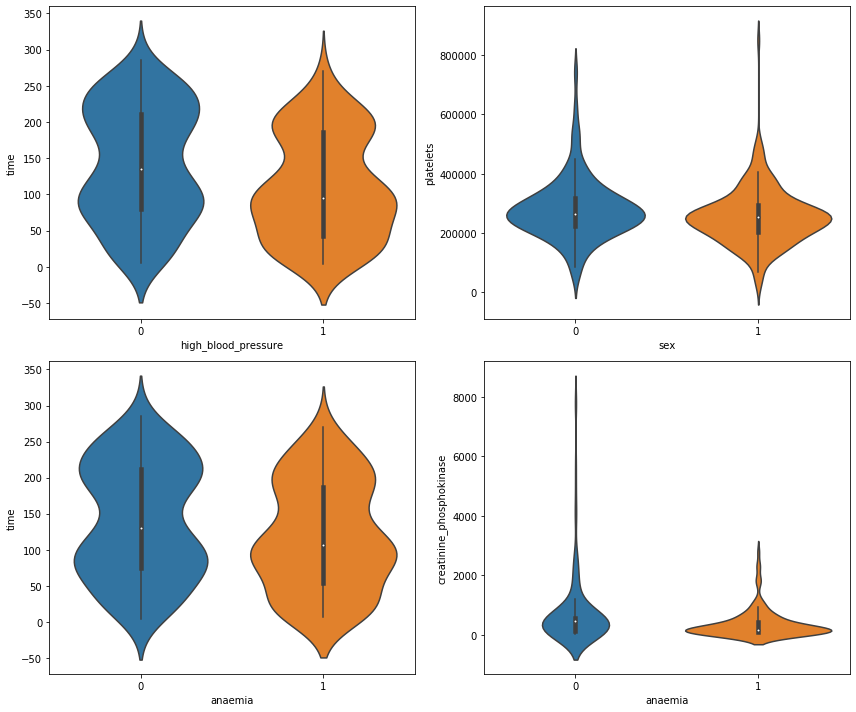

In [94]:
plt.figure(figsize = (12, 10))
subplot(2, 2, 1)
sns.violinplot(y = df.time, x = df.high_blood_pressure)

subplot(2, 2, 2)
sns.violinplot(y = df.platelets, x = df.sex)

subplot(2, 2, 3)
sns.violinplot(y = df.time, x = df.anaemia)

subplot(2, 2, 4)
sns.violinplot(y = df.creatinine_phosphokinase, x = df.anaemia)
plt.tight_layout()
plt.show()

<i>People with anaemia often have low count creatinine_phosphokinase in blood than other.<br>
It is possible that patients with high blood pressure or with a reduced count of erythrocytes were very closely monitored (since the risk of heart failure greatly increases, the correlation confirmed this). That way these people probably had more effective treatment or died faster then other, therefore the observation time becomes shorter.

## Modeling

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from  xgboost import XGBClassifier 
from sklearn.linear_model import LogisticRegression

In [15]:
X = df.drop('DEATH_EVENT', axis = 1)
y = df['DEATH_EVENT']

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2) 

def model(cls):
    cls.fit(train_x, train_y)
    y_pred = cls.predict(test_x)
    print('Accuracy-score: {0}, F1-score: {1}, ROC-AUC-score: {2}'.format(round(accuracy_score(y_pred, test_y), 5), 
                                                                       round(f1_score(y_pred, test_y), 5), 
                                                                          round(roc_auc_score(y_pred, test_y), 5)))
    print('Confusion matrix:')
    sns.heatmap(confusion_matrix(y_pred, test_y), annot = True, cmap = plt.cm.Blues)
    plt.show()

Logistic Regression
Accuracy-score: 0.83333, F1-score: 0.73684, ROC-AUC-score: 0.80745
Confusion matrix:


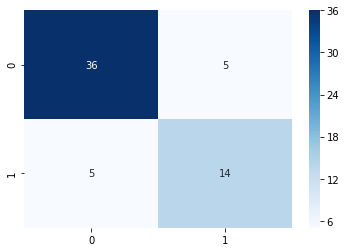

In [16]:
logreg = LogisticRegression()
print('Logistic Regression')
model(logreg)

Random Forest
Accuracy-score: 0.83333, F1-score: 0.7619, ROC-AUC-score: 0.80729
Confusion matrix:


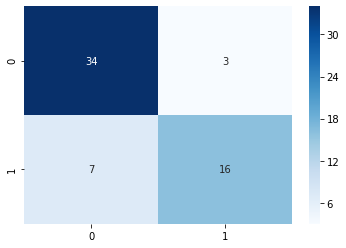

In [17]:
forcls = RandomForestClassifier()
print('Random Forest')
model(forcls)

Gradient booster classifier
Accuracy-score: 0.85, F1-score: 0.76923, ROC-AUC-score: 0.825
Confusion matrix:


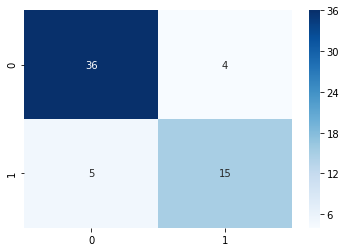

In [18]:
xgbcls = XGBClassifier(booster = 'gbtree')
print('Gradient booster classifier')
model(xgbcls)

Results:
* Log regression - Accuracy-score: 0.83333, F1-score: 0.75, ROC-AUC-score: 0.8125
* Random forest - Accuracy-score: 0.85, F1-score: 0.74286, ROC-AUC-score: 0.85556
* Gradient Booster Classifier - Accuracy-score: 0.9, F1-score: 0.85, ROC-AUC-score: 0.8875